P1 Red neuronal perceptrón para predicción

In [1]:
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### 1. Lectura del dataset

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(10) #Muestra 10 datos

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.shape #Numero de columnas y filas
df.describe #
df.dtypes #Tipo de dato

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
edad = df["age"].values #Crear lista de columnas del archivo csv
sexo = df["sex"].values
imc = df["bmi"].values
cargos = df["charges"].values

Text(0.5, 1.0, 'Grafico de dispersion Edad vs Cargos')

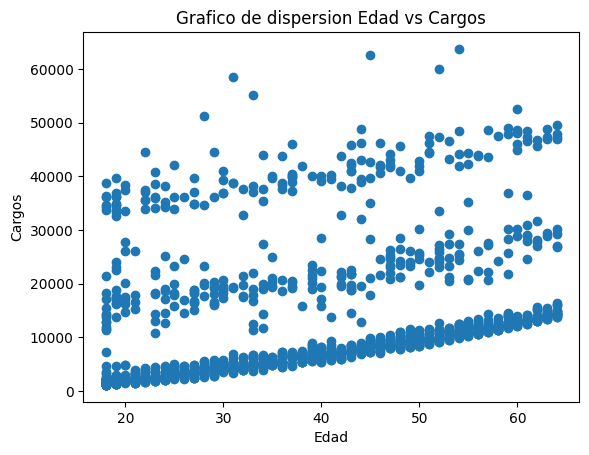

In [7]:
plt.scatter(edad,cargos)
plt.xlabel("Edad")
plt.ylabel("Cargos")
plt.title("Grafico de dispersion Edad vs Cargos")

<Axes: >

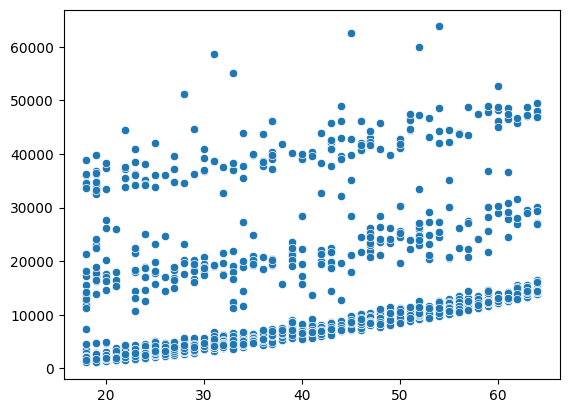

In [8]:
sb.scatterplot(x= edad, y= cargos)

Text(0.5, 1.0, 'Grafico de dispersion Edad vs Cargos menores 10000')

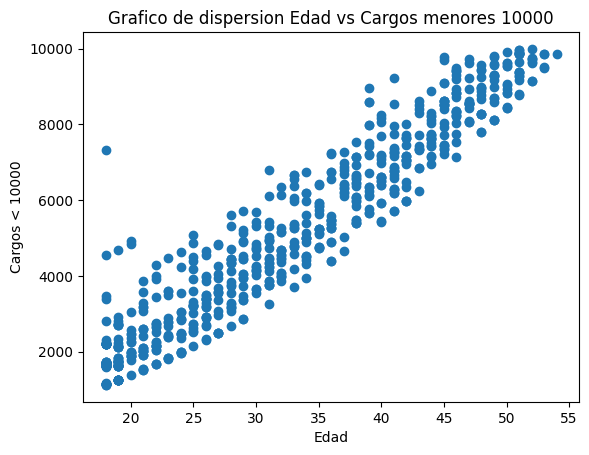

In [9]:
menores10000 = df[df["charges"]<=10000]
x_edad=menores10000["age"].values
y_cargos=menores10000["charges"].values
plt.scatter(x_edad,y_cargos)
plt.xlabel("Edad")
plt.ylabel("Cargos < 10000")
plt.title("Grafico de dispersion Edad vs Cargos menores 10000")

In [10]:
x_edad_ord=np.sort(x_edad) #Orden ascendente de arreglos
y_cargos_ord=np.sort(y_cargos)

2.- SKlearn

In [11]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_edad, y_cargos, train_size=0.8)#0.8 80% de los datos

In [12]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(569,)
(143,)
(569,)
(143,)


3.- TensorFlow

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer

In [14]:
model=Sequential()
model.add(InputLayer(input_shape=(1,))) #agrega una entrada al modelo
model.add(Dense(units=100, activation='relu'))#agrega una entrada oculta
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1))#salida del modelo neuronal

c:\Users\edgar.LAP-EAHA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss="MSE", optimizer=tf.keras.optimizers.RMSprop(0.01), metrics=["mse"])


In [17]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29095704.0000 - mse: 29095704.0000  
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4800510.5000 - mse: 4800510.5000 
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1210990.7500 - mse: 1210990.7500 
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1236091.8750 - mse: 1236091.8750 
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1227178.0000 - mse: 1227178.0000 
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1377249.0000 - mse: 1377249.0000
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1277125.3750 - mse: 1277125.3750 
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1160718.2500 - mse: 1160718.2500
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1194330.2500 - mse: 1194330.2500 
Epoch 10/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1132176.0000 - mse: 1132176.0000 
Epoch 11/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1212036.

In [18]:
ypred=model.predict(X_test)
ypred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[ 4324.5483],
       [ 7282.892 ],
       [ 8515.536 ],
       [ 6050.249 ],
       [ 2845.377 ],
       [ 3338.434 ],
       [ 4324.5483],
       [ 1859.2617],
       [ 9748.18  ],
       [ 7036.3633],
       [ 3584.9624],
       [ 5803.72  ],
       [ 6050.249 ],
       [ 3338.434 ],
       [ 4571.0776],
       [ 1859.2617],
       [ 2105.7908],
       [10487.765 ],
       [ 2598.848 ],
       [ 8269.007 ],
       [ 3091.9053],
       [ 8515.536 ],
       [ 7775.9497],
       [ 7529.4214],
       [ 1859.2617],
       [ 3338.434 ],
       [ 6050.249 ],
       [ 2352.3193],
       [ 7036.3633],
       [ 2598.848 ],
       [ 5557.192 ],
       [ 2845.377 ],
       [ 2598.848 ],
       [ 2105.7908],
       [ 6543.3066],
       [ 2598.848 ],
       [ 8762.064 ],
       [ 5803.72  ],
       [ 6543.3066],
       [ 4817.6055],
       [ 2845.377 ],
       [ 1859.2617],
       [ 5064.134 ],
       [ 9008.593 ],
       [ 2845.377 ],
       [ 7282.892 ],
       [ 1859.2617],
       [ 3831

In [19]:
from sklearn import metrics
score=metrics.r2_score(Y_test, ypred)
score

0.9018624849601629

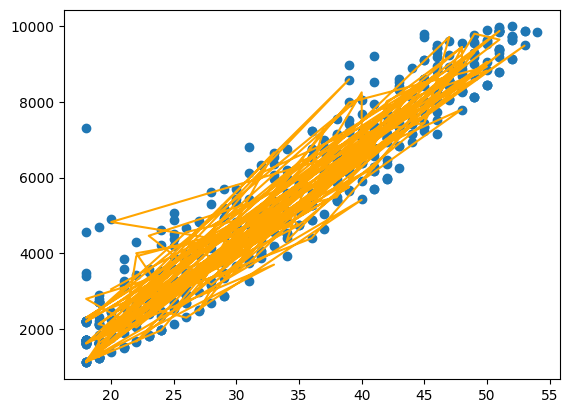

In [20]:
plt.scatter(X_train, Y_train)
plt.plot(X_test, Y_test, color="orange")

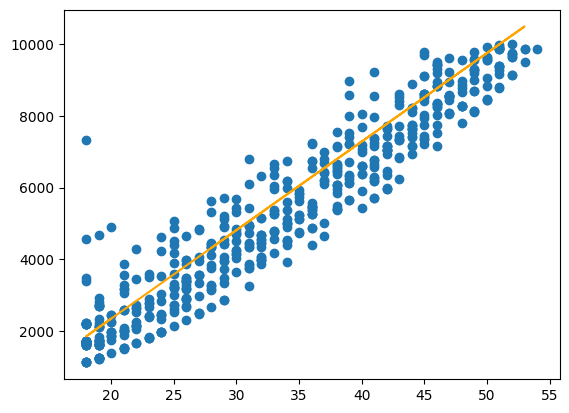

In [21]:
plt.scatter(X_train, Y_train)
plt.plot(X_test, ypred, color="orange")

In [ ]:
model.save("Red neuronal MLP.h5")

In [38]:
from tensorflow.keras.models import *
model1 = load_model("Red neuronal MLP.h5", compile=False)
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
conversion = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = conversion.convert()
open("predictor.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\EDGAR~1.LAP\AppData\Local\Temp\tmpps56lzp0\assets


INFO:tensorflow:Assets written to: C:\Users\EDGAR~1.LAP\AppData\Local\Temp\tmpps56lzp0\assets


Saved artifact at 'C:\Users\EDGAR~1.LAP\AppData\Local\Temp\tmpps56lzp0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2242614393344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2242614390176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2242614567408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2242614564240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2242614569872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2242614570576: TensorSpec(shape=(), dtype=tf.resource, name=None)


43488

In [ ]:
#xxd -i predictor
#tf -> tflite -> Carray
#xxd -i predictor.tflite > predictor.h